In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wav
import json

In [2]:
NOTES_MAP = json.load(open("notes_map.json", "r"))

In [3]:
WAVE_LOCATION = "Melody_Generated.wav"
DURATION = 3  # Seconds
wav_file = open(WAVE_LOCATION, "rb")
SAMPLE_RATE, data = wav.read(wav_file)

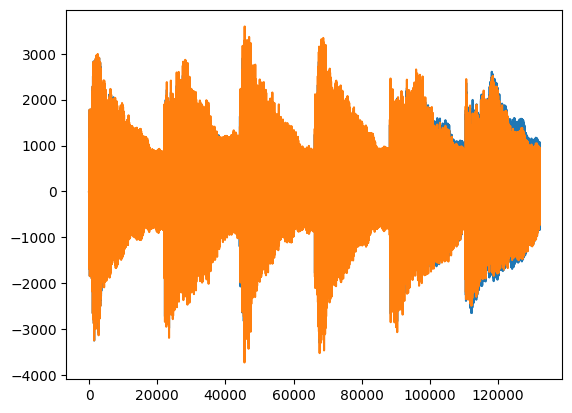

In [4]:
# Plot the time domain
t = 1 * np.arange(SAMPLE_RATE*DURATION)
plt.plot(t, data[:SAMPLE_RATE*DURATION])

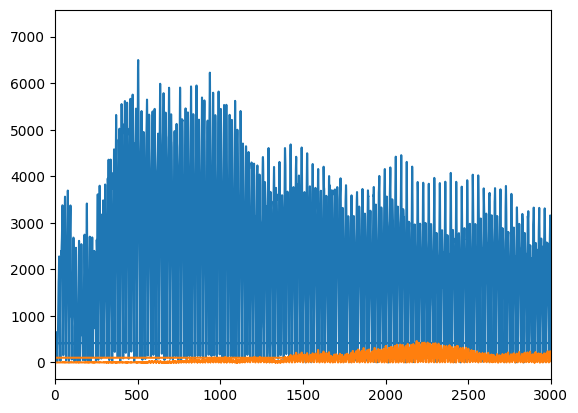

In [5]:
yf = fft(data[:SAMPLE_RATE*DURATION])
xf = fftfreq(SAMPLE_RATE*DURATION, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.xlim([0, 3e3])
plt.show()

In [8]:
# Map frequencies to magnitude
y = np.abs(yf).flatten()  # Flatten to ensure y is 1D

d = {}
for i in range(0, len(y)):
    if xf[i] > 0:
        d[f"{xf[i]}"] = y[i]  # Use scalar values from the flattened array

# Sort the dict so highest frequencies are at the top
d = sorted(d.items(), key=lambda item: item[1], reverse=True)  # Sort by magnitude

# Get the top 10 notes
bucket = []
for freq, _ in d:
    if len(bucket) == 10:
        break
    freq = round(float(freq))
    if freq not in bucket:
        bucket.append(freq)

# Map to notes
notes = []
for freq in bucket:
    for note, note_freq in NOTES_MAP.items():
        l_r = freq - 4
        h_r = freq + 4
        if l_r < note_freq < h_r:
            notes.append(note)
            break

print(list(set(notes)))

IndexError: index 132300 is out of bounds for axis 0 with size 132300